# FES for Alanine - NO Enhanced Sampling

In [10]:
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [11]:
# Load trajectory
traj = md.load_trr('/home/tje3676/chem-class-2023/comp-lab-class/Week5/Inputs/adp.trr', top='/home/tje3676/chem-class-2023/comp-lab-class/Week5/Inputs/adp.gro')

In [12]:
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)

## Plots

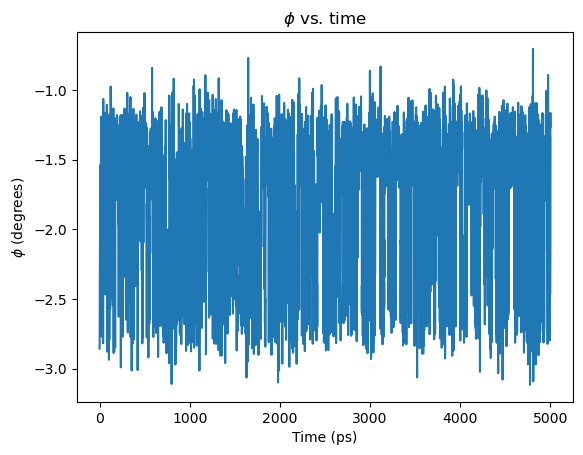

In [13]:
# Plot phi vs. time
plt.plot(traj.time, phi[1])
plt.title('$\phi$ vs. time')
plt.xlabel('Time (ps)')
plt.ylabel('$\phi$ (degrees)')
plt.show()

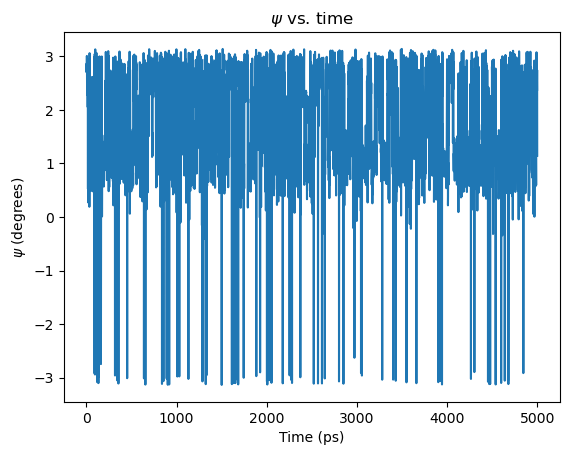

In [6]:
# Plot psi vs. time
plt.plot(traj.time, psi[1])
plt.title('$\psi$ vs. time')
plt.xlabel('Time (ps)')
plt.ylabel('$\psi$ (degrees)')
plt.show()

In [41]:
# Plot histogram of phi and psi
hist, x_edge, y_edge = np.histogram2d(
    phi[1].ravel(),
    psi[1].ravel(),
    bins=[20,20],
    range=[[-np.pi, np.pi], [-np.pi, np.pi]])

# Get FES

hist = - (300 * constants.Boltzmann) * np.log(hist)
hist = hist - np.min(hist)

/tmp/ipykernel_4146888/2149657031.py:10: RuntimeWarning: divide by zero encountered in log
  hist = - (300 * constants.Boltzmann) * np.log(hist)


<function matplotlib.pyplot.show(close=None, block=None)>

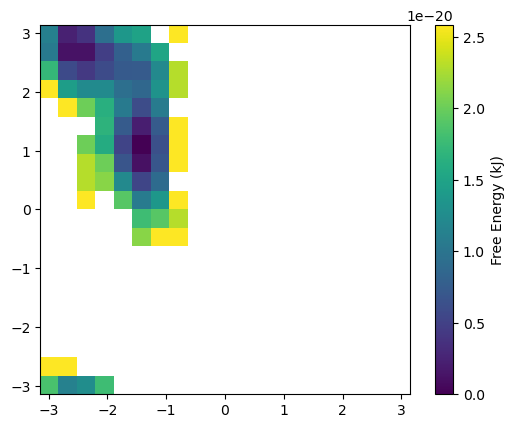

In [42]:
plt.imshow(hist.T, extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Free Energy (kJ)')
plt.show